In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
train = pd.read_csv('../input/dataverse/train.csv')
test = pd.read_csv('../input/dataverse/test.csv')
subm = pd.read_csv('../input/dataverse/sample_submission.csv')
pd.set_option('display.max_columns',None)
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [2]:
train['gear_box'].value_counts()

5    44211
6    14381
Name: gear_box, dtype: int64

<AxesSubplot:xlabel='is_claim', ylabel='Count'>

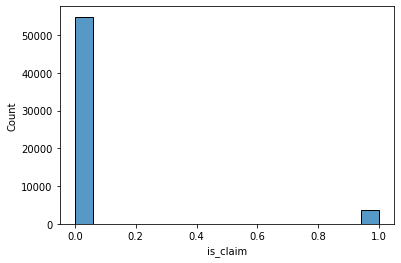

In [3]:
sns.histplot(train['is_claim'])

Text(0.5, 1.0, 'pearson correlation')

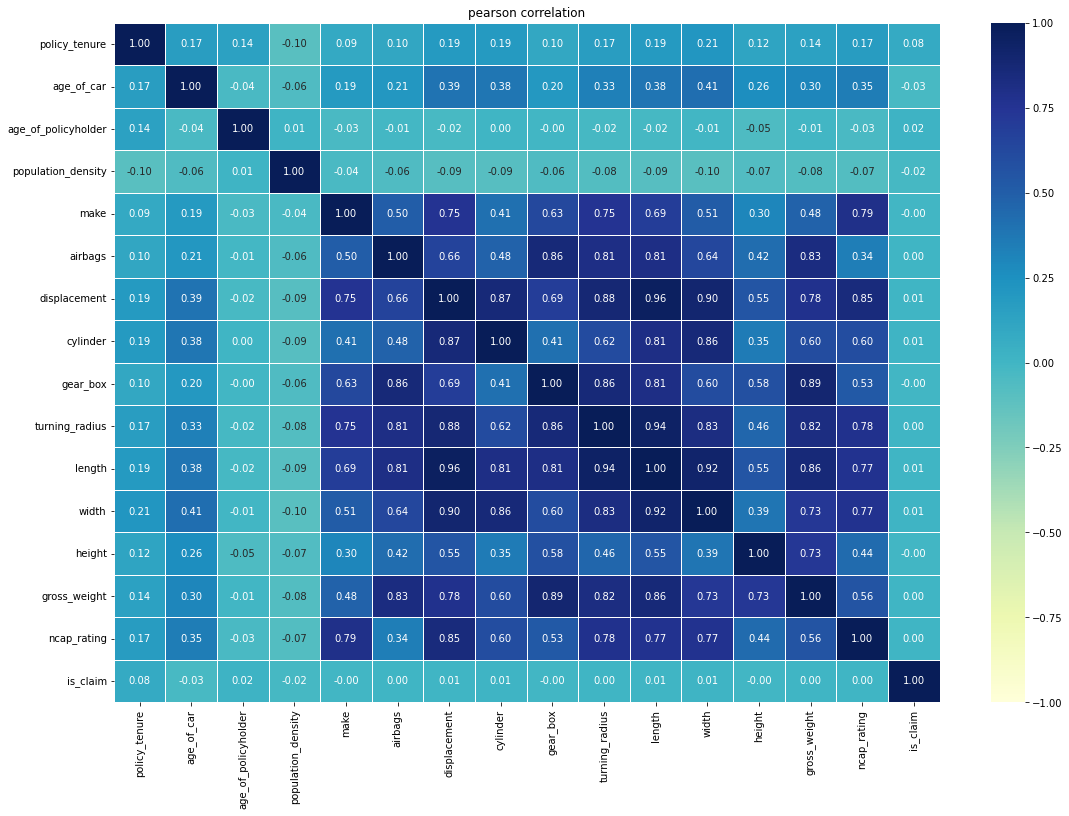

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18.5,12.5))
corr_matrix = train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("pearson correlation")

In [5]:
#sns.pairplot(train)

In [6]:
target = train['is_claim']
train.drop(['is_claim','policy_id'],axis=1,inplace=True)
policy_id = test['policy_id']
train_test = pd.concat([train,test],axis=0)
train_test.drop(['policy_id','airbags'],axis=1,inplace=True)
print(train_test.shape)
train_test['population_density'] = (train_test['population_density'] - np.min(train_test['population_density'])) / (np.max(train_test['population_density']) - np.min(train_test['population_density']))


(97655, 41)


In [7]:
max_torque_bhp = train_test['max_torque'].str.split("Nm", n = 1, expand = True)
max_torque_bhp_pd = pd.DataFrame(max_torque_bhp)
max_torque_bhp_pd.columns = ['max_torque_Nm','max_torque_rpm']

max_power  = train_test['max_power'].str.split("@", n = 1, expand = True)
max_power_pd = pd.DataFrame(max_power)
max_power_pd.columns = ['max_power_bhp','max_power_rpm']
train_test = pd.concat([train_test,max_torque_bhp_pd,max_power_pd],axis=1)
train_test['max_torque_rpm'] = train_test['max_torque_rpm'].str.replace('@','')
train_test['max_torque_rpm'] = train_test['max_torque_rpm'].str.replace('rpm','')
train_test['max_power_bhp'] = train_test['max_power_bhp'].str.replace('bhp','')
train_test['max_power_rpm'] = train_test['max_power_rpm'].str.replace('rpm','')
train_test['max_torque_rpm'] = train_test['max_torque_rpm'].astype(float)
train_test['max_power_bhp'] = train_test['max_power_bhp'].astype(float)
train_test['max_power_rpm'] = train_test['max_power_rpm'].astype(float)
train_test['max_torque_Nm'] = train_test['max_torque_Nm'].astype(float)
train_test.drop(['max_torque','max_power'],axis=1,inplace=True)
train_test.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.515874,0.05,0.644231,C1,0.064260,1,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
1,0.672619,0.02,0.375000,C2,0.365231,1,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
2,0.841110,0.02,0.384615,C3,0.051764,1,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
3,0.900277,0.11,0.432692,C4,0.291660,1,C1,M2,Petrol,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,88.50,6000.0
4,0.596403,0.11,0.634615,C5,0.470987,2,A,M3,Petrol,1.0 SCe,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,91.0,4250.0,67.06,5500.0


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for colname,coltype in train_test.dtypes.iteritems():
    if coltype == 'object':
        print("Encoding :","'" + colname + "'")
        train_test[colname] = label_encoder.fit_transform(train_test[colname].astype(str)) 
        colnames = train_test.groupby([colname]).size()
        #train_test[colname+"_Freq"]   = train_test[colname].apply(lambda x : colnames[x])
print(train.shape,test.shape)
train1 = train_test[0:train.shape[0]]
test1 = train_test[train.shape[0]:]

print(train1.shape,test1.shape)



Encoding : 'area_cluster'
Encoding : 'segment'
Encoding : 'model'
Encoding : 'fuel_type'
Encoding : 'engine_type'
Encoding : 'is_esc'
Encoding : 'is_adjustable_steering'
Encoding : 'is_tpms'
Encoding : 'is_parking_sensors'
Encoding : 'is_parking_camera'
Encoding : 'rear_brakes_type'
Encoding : 'transmission_type'
Encoding : 'steering_type'
Encoding : 'is_front_fog_lights'
Encoding : 'is_rear_window_wiper'
Encoding : 'is_rear_window_washer'
Encoding : 'is_rear_window_defogger'
Encoding : 'is_brake_assist'
Encoding : 'is_power_door_locks'
Encoding : 'is_central_locking'
Encoding : 'is_power_steering'
Encoding : 'is_driver_seat_height_adjustable'
Encoding : 'is_day_night_rear_view_mirror'
Encoding : 'is_ecw'
Encoding : 'is_speed_alert'
(58592, 42) (39063, 43)
(58592, 43) (39063, 43)


In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.covariance import GraphicalLasso
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
import lightgbm as lgb
from sklearn.preprocessing import LabelBinarizer
from xgboost import XGBClassifier
import xgboost as xgb
import gc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.covariance import OAS
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

pca = PCA(n_components=2)

def get_mean_cov(x,y):
    model = GraphicalLasso()
    ones = (y==1).astype(bool)
    x2 = x[ones]
    model.fit(x2)
    p1 = model.precision_
    m1 = model.location_
    
    onesb = (y==0).astype(bool)
    x2b = x[onesb]
    model.fit(x2b)
    p2 = model.precision_
    m2 = model.location_
    
    ms = np.stack([m1,m2])
    ps = np.stack([p1,p2])
    return ms,ps


from catboost import CatBoostClassifier
model_cat = CatBoostClassifier(iterations=50000,
                          verbose = 50,    
                          early_stopping_rounds = 50, 
                          random_seed = 1234,
                         use_best_model =True,
                         #classes_count = 13,
                         random_strength = .9,
                        # min_data_in_leaf  = 20,    
                          bagging_temperature = .7,    
                         subsample = .9,    
                          cat_features = ['area_cluster','segment','model','fuel_type','engine_type','is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','rear_brakes_type','transmission_type','steering_type','is_front_fog_lights','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert'],    
                          #n_estimators = 200,
                          learning_rate=0.05,
                          loss_function='Logloss',     
                          depth=4)
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    #'num_class':13,
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'max_depth': 10,
    'num_leaves': 10,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 17,
    'min_data_in_leaf': 20,    
    #'is_unbalance' : True ,    
    "max_bin": 400,      
     'lambda_l1' : 10,     
    'verbose' :-1
    #'scale_pos_weight':94
         }

    
xgb_parms = { 
    'max_depth':6, 
    'learning_rate':0.03, 
    'subsample':0.8,
    'colsample_bytree':0.7, 
    'eval_metric':'logloss',
    'objective':'binary:logistic',
    'tree_method':'exact',
    #'max_leaves':10,
    #'reg_lambda': 5,
    #'scale_pos_weight': 1,
    #'predictor':'gpu_predictor',
    'random_state': 1234,
    #'scale_pos_weight':.94
    #'num_class': 13,
    
}

models = []

rf_pred = 0
lgbm_pred = 0
xgb_pred = 0
cat_pred = 0
onevsrest_pred =0
hist_pred = 0
qda_pred = 0  
rf_pred = 0  


oof = np.zeros(len(train1))
#oof = oof.reshape(len(train1),13)

oof_xgb = np.zeros(len(train1))
#oof_xgb = oof_xgb.reshape(len(train1),13)

oof_cat = np.zeros(len(train1))
#oof_cat = oof_cat.reshape(len(train1),13)

oof_onevsrest = np.zeros((len(train1))*13)
oof_onevsrest = oof_onevsrest.reshape(len(train1),13)

oof_rf = np.zeros((len(train1)))
#oof_rf = oof_rf.reshape(len(train1),13)

oof_hist = np.zeros((len(train1)))
#oof_hist = oof_hist.reshape(len(train1),13)

oof_qda = np.zeros(len(train1))

categorical_features = ['area_cluster','segment','model','fuel_type','engine_type','is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','rear_brakes_type','transmission_type','steering_type','is_front_fog_lights','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']          
gc.collect()
importances = []
importances_xgb = []
Xt, Xv, Yt, Yv = train_test_split(train1, target, test_size=0.05, random_state=2, stratify=target)
FOLDS = 5
skf = KFold(n_splits=FOLDS, random_state = 1, shuffle=True)
#skf = StratifiedShuffleSplit(n_splits=FOLDS, test_size=0.05, random_state=0)
np.random.seed(0)
#sss.get_n_splits(train1, target_num)
for fold,(train_idx, valid_idx) in enumerate(skf.split(
            train1, target )):
    
    
    #rf_clf =  RandomForestClassifier(random_state = 123,n_estimators=5,criterion='entropy',class_weight='balanced',max_features='sqrt',max_depth=6,min_samples_split=10)
    #rf_clf.fit(train1.loc[train_idx],target.loc[train_idx])
    
    lgb_train = lgb.Dataset(train1.loc[train_idx], target.loc[train_idx])
    lgb_eval = lgb.Dataset(train1.loc[valid_idx], target.loc[valid_idx])

    
    #lgb_train = lgb.Dataset(Xt, Yt)
    #lgb_eval = lgb.Dataset(Xv, Yv)
    
    model_cat = model_cat.fit(train1.loc[train_idx], target.loc[train_idx],eval_set=(train1.loc[valid_idx], target.loc[valid_idx]))
    model = lgb.train(params, lgb_train,valid_sets=[lgb_train, lgb_eval],categorical_feature = categorical_features,  num_boost_round=100000,early_stopping_rounds=50)
    #,categorical_feature=['GENDER','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','TYPE_OF_VEHICLE','POSTAL_CODE','MARRIED','AGE']
    
    dtrain = xgb.DMatrix(data=train1.loc[train_idx], label=target.loc[train_idx])
    dvalid = xgb.DMatrix(data=train1.loc[valid_idx], label=target.loc[valid_idx])
    #del ,y_train,X_valid
    _ = gc.collect()
    # TRAIN MODEL FOLD K
    model_xgb = xgb.train(xgb_parms,dtrain=dtrain,evals=[(dtrain,'train'),(dvalid,'valid')],num_boost_round=9999,early_stopping_rounds=50,verbose_eval=50) 
    #model_xgb.save_model(f'XGB_fold{fold}.xgb')
    
    # GET FEATURE IMPORTANCE FOR FOLD K
    dd = model_xgb.get_score(importance_type='weight')
    df = pd.DataFrame({'feature':dd.keys(),f'importance_{fold}':dd.values()})
    importances.append(df) 
    #model = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',num_class=13, num_leaves=50,
    #                            learning_rate=0.1, n_estimators=100000, max_depth=16,
    #                            bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2,verbose_eval=50)
    #model.fit(train1.loc[train_idx],target_num.loc[train_idx].values.ravel())
    
    #clf = HistGradientBoostingClassifier(learning_rate=0.03, max_iter=60, max_leaf_nodes=10, max_depth=3,loss='binary_crossentropy',random_state=1234)
#loss='log_loss', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None    
    #clf = NaivelyCalibratedLinearSVC(C=1.0)
    #clf.fit(train1.loc[train_idx], target.loc[train_idx])
    
    #oof_hist_pred = clf.predict_proba(train1.loc[valid_idx])[:,1]
    #oof_hist[valid_idx] = oof_hist_pred
    #hist_pred = hist_pred + clf.predict_proba(test1)[:,1]

    #oof_rfs = rf_clf.predict_proba(train1.loc[valid_idx])[:,1]
    #oof_rf[valid_idx] = oof_rfs
    #rf_pred = rf_pred + rf_clf.predict_proba(test1)[:,1]
    
    oof_preds = model.predict(train1.loc[valid_idx])
    oof[valid_idx] = oof_preds
    lgbm_pred = lgbm_pred + model.predict(test1)
    
    oof_cat_pred = model_cat.predict_proba(train1.loc[valid_idx])[:,1]
    oof_cat[valid_idx] = oof_cat_pred
    cat_pred = cat_pred + model_cat.predict_proba(test1)[:,1]
    
    
    oof_preds_xgb = model_xgb.predict(xgb.DMatrix(train1.loc[valid_idx]))
    oof_xgb[valid_idx] = oof_preds_xgb
    xgb_pred = xgb_pred + model_xgb.predict(xgb.DMatrix(test1))
    
    #clf1 = QuadraticDiscriminantAnalysis(reg_param=0.25)
    #ms, ps = get_mean_cov(train1.loc[train_idx],target.loc[train_idx].values)
    clf = LinearDiscriminantAnalysis(n_components=1,solver="lsqr")
    #oa = OAS(store_precision=False, assume_centered=False)
    #clf = LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oa)
    clf.fit(train1.loc[train_idx],target.loc[train_idx])
    #clf1.fit(train1.loc[train_idx],target.loc[train_idx])
    oof_qda[valid_idx] = (clf.predict_proba(train1.loc[valid_idx])[:,1] )
    qda_pred = qda_pred + (clf.predict_proba(test1)[:,1])
    
    models.append(model)
    dd = model_xgb.get_score(importance_type='weight')
    df = pd.DataFrame({'feature':dd.keys(),f'importance_{fold}':dd.values()})
    importances_xgb.append(df)
            
lgbm_pred = lgbm_pred /FOLDS  
xgb_pred = xgb_pred /FOLDS  
cat_pred = cat_pred/FOLDS
hist_pred = hist_pred/FOLDS
qda_pred = qda_pred/FOLDS
rf_pred = rf_pred/FOLDS

0:	learn: 0.6367400	test: 0.6368613	best: 0.6368613 (0)	total: 103ms	remaining: 1h 26m 10s
50:	learn: 0.2314916	test: 0.2342444	best: 0.2342444 (50)	total: 1.97s	remaining: 32m 8s
100:	learn: 0.2276607	test: 0.2314601	best: 0.2314601 (100)	total: 3.82s	remaining: 31m 29s
150:	learn: 0.2267527	test: 0.2312569	best: 0.2312485 (145)	total: 5.58s	remaining: 30m 42s
200:	learn: 0.2259137	test: 0.2313208	best: 0.2312427 (159)	total: 7.49s	remaining: 30m 55s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2312427371
bestIteration = 159

Shrink model to first 160 iterations.


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering', 'is_brake_assist', 'is_central_locking', 'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable', 'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera', 'is_parking_sensors', 'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger', 'is_speed_alert', 'is_tpms', 'model', 'rear_brakes_type', 'segment', 'steering_type', 'transmission_type']
  _log_warning('categorical_feature in Datase

[1]	training's binary_logloss: 0.236532	valid_1's binary_logloss: 0.238734
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.235827	valid_1's binary_logloss: 0.238118
[3]	training's binary_logloss: 0.235184	valid_1's binary_logloss: 0.237561
[4]	training's binary_logloss: 0.234765	valid_1's binary_logloss: 0.237233
[5]	training's binary_logloss: 0.234223	valid_1's binary_logloss: 0.236757
[6]	training's binary_logloss: 0.233715	valid_1's binary_logloss: 0.236307
[7]	training's binary_logloss: 0.233242	valid_1's binary_logloss: 0.235893
[8]	training's binary_logloss: 0.23282	valid_1's binary_logloss: 0.235533
[9]	training's binary_logloss: 0.232422	valid_1's binary_logloss: 0.235197
[10]	training's binary_logloss: 0.232059	valid_1's binary_logloss: 0.234884
[11]	training's binary_logloss: 0.231727	valid_1's binary_logloss: 0.234607
[12]	training's binary_logloss: 0.231366	valid_1's binary_logloss: 0.234295
[13]	training's binary_logloss: 0.231

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering', 'is_brake_assist', 'is_central_locking', 'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable', 'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera', 'is_parking_sensors', 'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger', 'is_speed_alert', 'is_tpms', 'model', 'rear_brakes_type', 'segment', 'steering_type', 'transmission_type']
  _log_warning('categorical_feature in Datase

[2]	training's binary_logloss: 0.236015	valid_1's binary_logloss: 0.237563
[3]	training's binary_logloss: 0.23538	valid_1's binary_logloss: 0.236891
[4]	training's binary_logloss: 0.234989	valid_1's binary_logloss: 0.2365
[5]	training's binary_logloss: 0.234471	valid_1's binary_logloss: 0.235987
[6]	training's binary_logloss: 0.234022	valid_1's binary_logloss: 0.235518
[7]	training's binary_logloss: 0.233611	valid_1's binary_logloss: 0.235109
[8]	training's binary_logloss: 0.233233	valid_1's binary_logloss: 0.234742
[9]	training's binary_logloss: 0.232841	valid_1's binary_logloss: 0.234316
[10]	training's binary_logloss: 0.232499	valid_1's binary_logloss: 0.233998
[11]	training's binary_logloss: 0.232208	valid_1's binary_logloss: 0.23372
[12]	training's binary_logloss: 0.23195	valid_1's binary_logloss: 0.233472
[13]	training's binary_logloss: 0.23166	valid_1's binary_logloss: 0.233185
[14]	training's binary_logloss: 0.231438	valid_1's binary_logloss: 0.232975
[15]	training's binary_log

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering', 'is_brake_assist', 'is_central_locking', 'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable', 'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera', 'is_parking_sensors', 'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger', 'is_speed_alert', 'is_tpms', 'model', 'rear_brakes_type', 'segment', 'steering_type', 'transmission_type']
  _log_warning('categorical_feature in Datase

[7]	training's binary_logloss: 0.234953	valid_1's binary_logloss: 0.229483
[8]	training's binary_logloss: 0.23455	valid_1's binary_logloss: 0.229166
[9]	training's binary_logloss: 0.234153	valid_1's binary_logloss: 0.228856
[10]	training's binary_logloss: 0.233787	valid_1's binary_logloss: 0.228555
[11]	training's binary_logloss: 0.233447	valid_1's binary_logloss: 0.228276
[12]	training's binary_logloss: 0.233133	valid_1's binary_logloss: 0.228013
[13]	training's binary_logloss: 0.232787	valid_1's binary_logloss: 0.227739
[14]	training's binary_logloss: 0.232546	valid_1's binary_logloss: 0.227554
[15]	training's binary_logloss: 0.232241	valid_1's binary_logloss: 0.227325
[16]	training's binary_logloss: 0.231974	valid_1's binary_logloss: 0.227142
[17]	training's binary_logloss: 0.231824	valid_1's binary_logloss: 0.227064
[18]	training's binary_logloss: 0.231734	valid_1's binary_logloss: 0.227063
[19]	training's binary_logloss: 0.231551	valid_1's binary_logloss: 0.226979
[20]	training's 

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering', 'is_brake_assist', 'is_central_locking', 'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable', 'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera', 'is_parking_sensors', 'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger', 'is_speed_alert', 'is_tpms', 'model', 'rear_brakes_type', 'segment', 'steering_type', 'transmission_type']
  _log_warning('categorical_feature in Datase

[1]	training's binary_logloss: 0.238436	valid_1's binary_logloss: 0.231442
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.237794	valid_1's binary_logloss: 0.230808
[3]	training's binary_logloss: 0.237209	valid_1's binary_logloss: 0.230238
[4]	training's binary_logloss: 0.236811	valid_1's binary_logloss: 0.229792
[5]	training's binary_logloss: 0.23627	valid_1's binary_logloss: 0.229229
[6]	training's binary_logloss: 0.235802	valid_1's binary_logloss: 0.228774
[7]	training's binary_logloss: 0.235379	valid_1's binary_logloss: 0.228374
[8]	training's binary_logloss: 0.234952	valid_1's binary_logloss: 0.22795
[9]	training's binary_logloss: 0.234593	valid_1's binary_logloss: 0.227593
[10]	training's binary_logloss: 0.234267	valid_1's binary_logloss: 0.227268
[11]	training's binary_logloss: 0.23391	valid_1's binary_logloss: 0.226923
[12]	training's binary_logloss: 0.233635	valid_1's binary_logloss: 0.226683
[13]	training's binary_logloss: 0.23332

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering', 'is_brake_assist', 'is_central_locking', 'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable', 'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera', 'is_parking_sensors', 'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger', 'is_speed_alert', 'is_tpms', 'model', 'rear_brakes_type', 'segment', 'steering_type', 'transmission_type']
  _log_warning('categorical_feature in Datase

[3]	training's binary_logloss: 0.233866	valid_1's binary_logloss: 0.243593
[4]	training's binary_logloss: 0.233416	valid_1's binary_logloss: 0.243228
[5]	training's binary_logloss: 0.232883	valid_1's binary_logloss: 0.242697
[6]	training's binary_logloss: 0.23242	valid_1's binary_logloss: 0.242265
[7]	training's binary_logloss: 0.232007	valid_1's binary_logloss: 0.241884
[8]	training's binary_logloss: 0.231614	valid_1's binary_logloss: 0.241517
[9]	training's binary_logloss: 0.231216	valid_1's binary_logloss: 0.24113
[10]	training's binary_logloss: 0.230873	valid_1's binary_logloss: 0.240804
[11]	training's binary_logloss: 0.230552	valid_1's binary_logloss: 0.240489
[12]	training's binary_logloss: 0.230283	valid_1's binary_logloss: 0.240243
[13]	training's binary_logloss: 0.230011	valid_1's binary_logloss: 0.239967
[14]	training's binary_logloss: 0.229758	valid_1's binary_logloss: 0.23974
[15]	training's binary_logloss: 0.229538	valid_1's binary_logloss: 0.239528
[16]	training's binary

(<Figure size 1238.4x504 with 1 Axes>,
 <AxesSubplot:xlabel='column', ylabel='feature_importance'>)

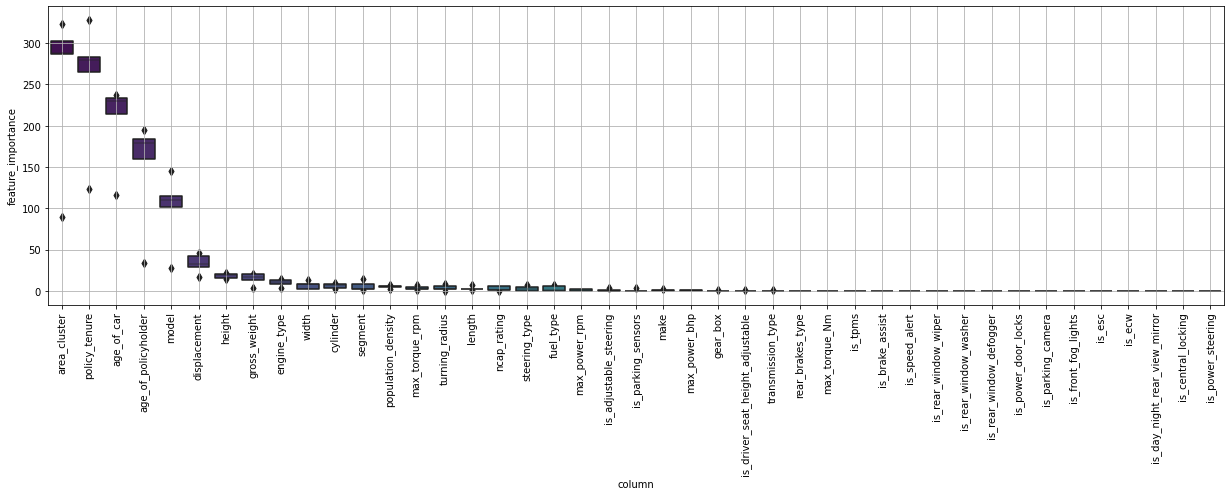

In [10]:
#Feature Importance of lightgbm model
from matplotlib import pyplot as plt
import seaborn as sns
def visualize_importance(models, X_train):
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["feature_importance"] = model.feature_importance()
        _df["column"] = X_train.columns
        _df["fold"] = i + 1
        feature_importance_df = pd.concat(
            [feature_importance_df, _df], axis=0, ignore_index=True
        )

    order = (
        feature_importance_df.groupby("column")
        .sum()[["feature_importance"]]
        .sort_values("feature_importance", ascending=False)
        .index[:50]
    )
    
    feature_importance_df.to_csv('feature_importance_lgb.csv', index=False)
    

    fig, ax = plt.subplots(figsize=(max(6, len(order) * 0.4), 7))
    sns.boxenplot(
        data=feature_importance_df,
        x="column",
        y="feature_importance",
        order=order,
        ax=ax,
        palette="viridis",
    )
    ax.tick_params(axis="x", rotation=90)
    ax.grid()
    fig.tight_layout()
    return fig, ax

#Feature importance visualiztion for LGBM model
visualize_importance(models, train1)

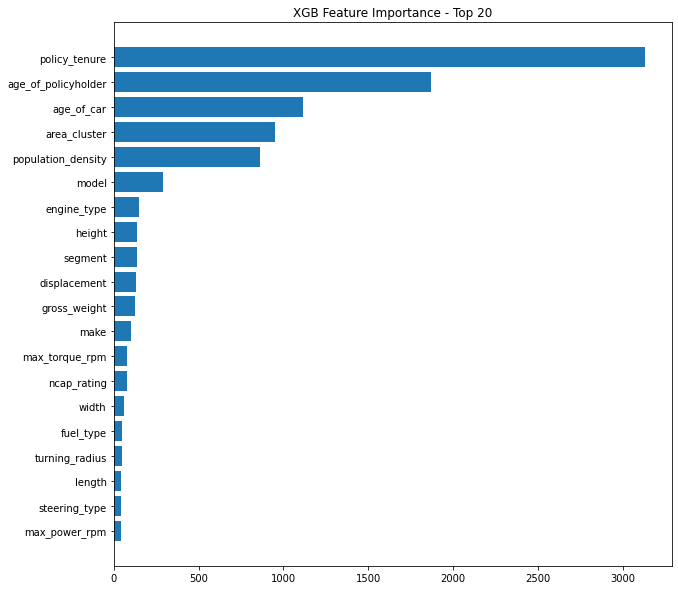

In [11]:
df = importances_xgb[1].copy()
for k in range(1,FOLDS): df = df.merge(importances[k], on='feature', how='left')
df['importance'] = df.iloc[:,1:].mean(axis=1)
df = df.sort_values('importance',ascending=False)
df.to_csv(f'xgb_feature_importance_v.csv',index=False)
NUM_FEATURES = 20
plt.figure(figsize=(10,5*NUM_FEATURES//10))
plt.barh(np.arange(NUM_FEATURES,0,-1), df.importance.values[:NUM_FEATURES])
plt.yticks(np.arange(NUM_FEATURES,0,-1), df.feature.values[:NUM_FEATURES])
plt.title(f'XGB Feature Importance - Top {NUM_FEATURES}')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


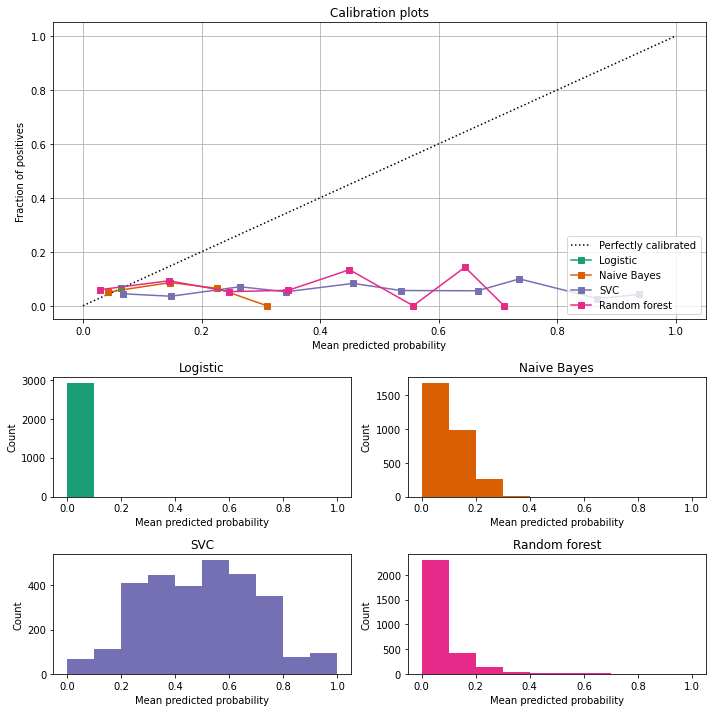

In [12]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
]
    
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

Xt, Xv, Yt, Yv

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(Xt, Yt)
    display = CalibrationDisplay.from_estimator(
        clf,
        Xv,
        Yv,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [13]:
from xgboost import plot_tree,to_graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
# plot single tree
plt.figure(figsize=(185,125))

for tree_index in range(5):
    dot = to_graphviz(model_xgb, num_trees=tree_index)
    dot.render("trees/tree{}".format(tree_index))
    
#print_graph(model_xgb,train1.columns)
plt.show()


<Figure size 13320x9000 with 0 Axes>

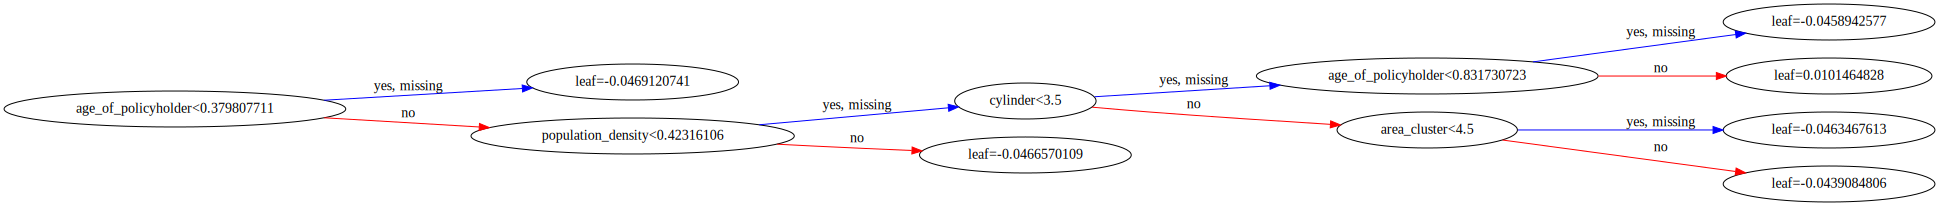

<Figure size 720x720 with 0 Axes>

In [14]:
plt.figure(figsize=(10,10))

to_graphviz(model_xgb,num_trees=5,  rankdir='LR')
#plot_tree(model_xgb,num_trees=5,  rankdir='LR')

<AxesSubplot:>

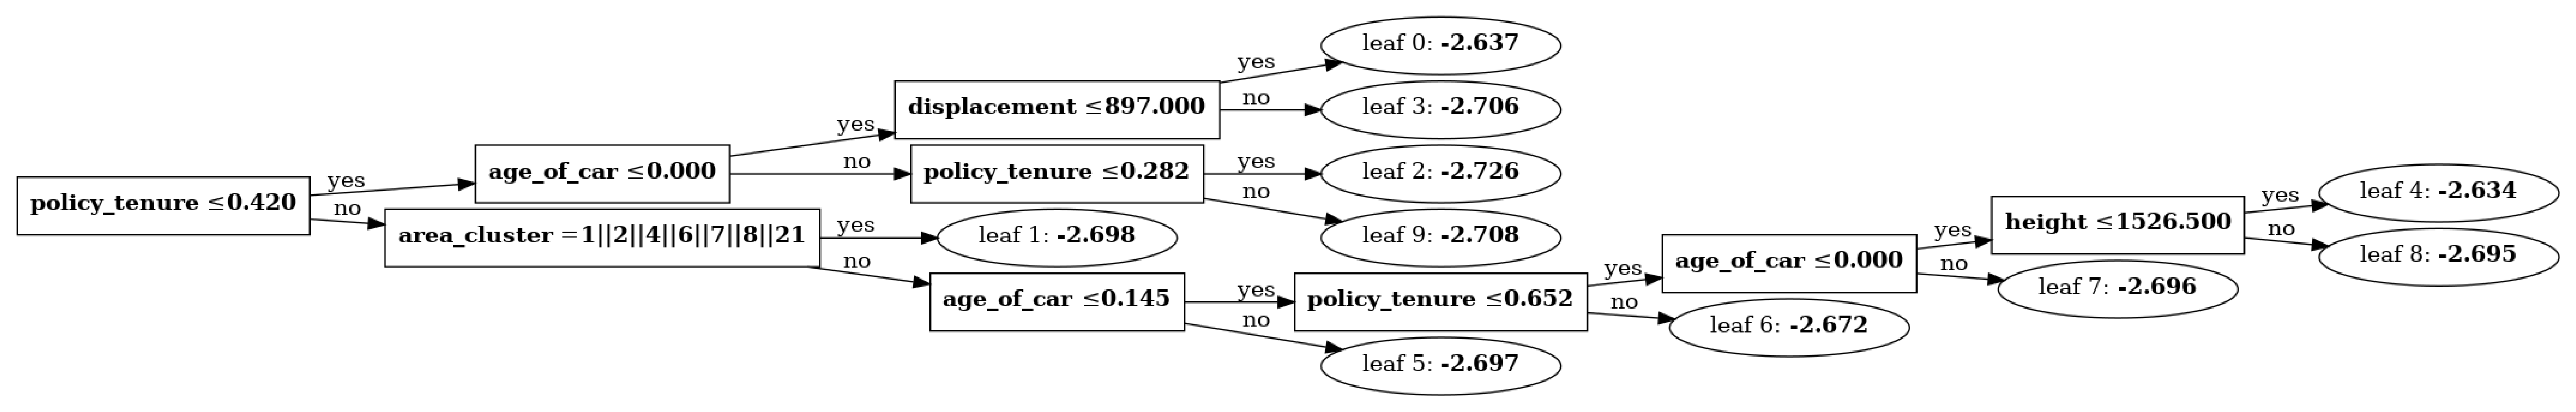

In [15]:
import lightgbm
lightgbm.plot_tree(model,figsize=(30,20),dpi=300)

In [16]:
from sklearn.metrics import f1_score,accuracy_score,classification_report
from termcolor import colored
acc_valid = accuracy_score(np.where(oof > .12,1,0),target)
#np.where(model.predict_proba(train)[:,1]>thresh,1,0)
acc_valid_cat = accuracy_score(np.where(oof_cat > .09 ,1,0),target)
acc_valid_xgb = accuracy_score(np.where(oof_xgb > .09,1,0),target)

print(colored(f'The accuracy attained on the validation set is {acc_valid}','green',attrs=['bold']))
print(colored(f'The accuracy attained on the validation set is {acc_valid_cat}','green',attrs=['bold']))
print(colored(f'The accuracy attained on the validation set is {acc_valid_xgb}','green',attrs=['bold']))

The accuracy attained on the validation set is 0.905891589295467
The accuracy attained on the validation set is 0.7722214636810486
The accuracy attained on the validation set is 0.7568098033861278


In [17]:
print('\n')
print('The classification report only on the validation data is below LGBM-')
print(colored(classification_report(target, np.where(oof > .095,1,0)),'blue',attrs=['bold']))
print('\n')      
print('The classification report only on the validation data is below CAT-')
print(colored(classification_report(target, np.where(oof_cat > .09 ,1,0)),'red',attrs=['bold']))
print('\n')      
print('The classification report only on the validation data is below XGB-')
print(colored(classification_report(target, np.where(oof_xgb > .06,1,0)),'green',attrs=['bold']))

print('The classification report only on the validation data is below lgb & XGB-')
print(colored(classification_report(target, np.where((oof+oof_cat)/2 > .09,1,0)),'green',attrs=['bold']))

#print('The classification report only on the validation data is below XGB New-')
#print(colored(classification_report(target, np.where(train1_xgb_pred_new> .18,1,0)),'green',attrs=['bold']))




The classification report only on the validation data is below LGBM-
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     54844
           1       0.11      0.32      0.17      3748

    accuracy                           0.80     58592
   macro avg       0.53      0.57      0.53     58592
weighted avg       0.89      0.80      0.84     58592



The classification report only on the validation data is below CAT-
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     54844
           1       0.11      0.37      0.17      3748

    accuracy                           0.77     58592
   macro avg       0.53      0.58      0.52     58592
weighted avg       0.90      0.77      0.82     58592



The classification report only on the validation data is below XGB-
              precision    recall  f1-score   support

           0       0.96      0.51      0.66     54844
           1       0.09   

In [18]:
from sklearn.metrics import f1_score
print(f1_score(target, np.where(oof > .09,1,0), average=None))
print(f1_score(target, np.where(oof_cat > .09,1,0), average=None))
print(f1_score(target, np.where(oof_xgb > .09,1,0), average=None))
print(f1_score(target, np.where((oof_cat + oof)/2 > .10,1,0), average=None))
print(f1_score(target, np.where(oof_hist > .07,1,0), average=None))

[0.86274354 0.17036369]
[0.86796597 0.1712618 ]
[0.85764239 0.16628635]
[0.90882428 0.16105162]
[0.96695934 0.        ]


In [19]:
hist_pred = hist_pred/FOLDS
subm['is_claim'] = np.where(lgbm_pred > .09,1,0)
subm.to_csv('Sample_submission_lgb.csv',index=False)
print(subm['is_claim'].value_counts(normalize=True))

subm['is_claim'] = np.where(xgb_pred > .09,1,0)
subm.to_csv('Sample_submission_xgb.csv',index=False)
print(subm['is_claim'].value_counts(normalize=True))

subm['is_claim'] = np.where(cat_pred > .09,1,0)
subm.to_csv('Sample_submission_cat.csv',index=False)
print(subm['is_claim'].value_counts(normalize=True))

subm['is_claim'] = np.where((lgbm_pred  + cat_pred)/2 > .09,1,0)
subm.to_csv('Sample_submission__lgb_xgb.csv',index=False)
print(subm['is_claim'].value_counts(normalize=True))

#subm['is_claim'] = np.where((test1_xgb_pred_new) > .09,1,0)
#subm.to_csv('Sample_submission_xgb_new.csv',index=False)
#print(subm['is_claim'].value_counts(normalize=True))

0    0.777334
1    0.222666
Name: is_claim, dtype: float64
0    0.770192
1    0.229808
Name: is_claim, dtype: float64
0    0.786243
1    0.213757
Name: is_claim, dtype: float64
0    0.783248
1    0.216752
Name: is_claim, dtype: float64
